# Automobile Data Exploration 



DESCRIPTION:
             Mtcars, an automobile company in Chambersburg, United States, has recorded the production of its cars within a dataset. The company is coming up with a new model based on the feedback given by its customers. It has to explore the current dataset to derive further insights from it.
 

OBJECTIVE: Import the dataset, explore for dimensionality, and type and average value of the horsepower across all the cars. Also, identify a few of mostly correlated features, which would help in modification.


# Data Exploration
* import the Dataset
* check shape of the Dataset
* Extract features from Dataset


In [96]:
#import the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

In [98]:
#import the datasets
mtcars = pd.read_csv("C:\Datasets\mtcars.csv")

In [101]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [103]:
#check the shape of dataset
mtcars.shape

(32, 12)

In [104]:
#columns names
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [105]:
#type of horsepower
type(mtcars['hp'])

pandas.core.series.Series

In [106]:
mtcars['hp'].describe

<bound method NDFrame.describe of 0     110
1     110
2      93
3     110
4     175
5     105
6     245
7      62
8      95
9     123
10    123
11    180
12    180
13    180
14    205
15    215
16    230
17     66
18     52
19     65
20     97
21    150
22    150
23    245
24    175
25     66
26     91
27    113
28    264
29    175
30    335
31    109
Name: hp, dtype: int64>

In [107]:
#average of horsepower
avg = mtcars['hp'].mean()
avg

146.6875

In [87]:
type(mtcars)

pandas.core.frame.DataFrame

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

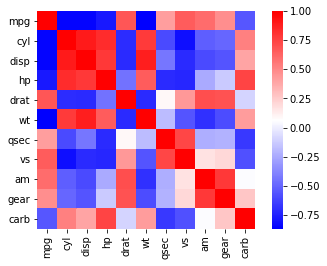

In [108]:
#heatmap
correlation = mtcars.corr()
sns.heatmap(data = correlation,square= True, cmap = 'bwr')

plt.xticks(rotation=90)
plt.yticks(rotation=0)

Red cells have maximum correlated features and blue cells have less correlated features.

# Data Wrangling
* check for the missing values.
* check for the outliers.

Objective: Check for missing values and outliers within the horsepower column and remove them.

In [109]:
#finding missing values
mtcars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

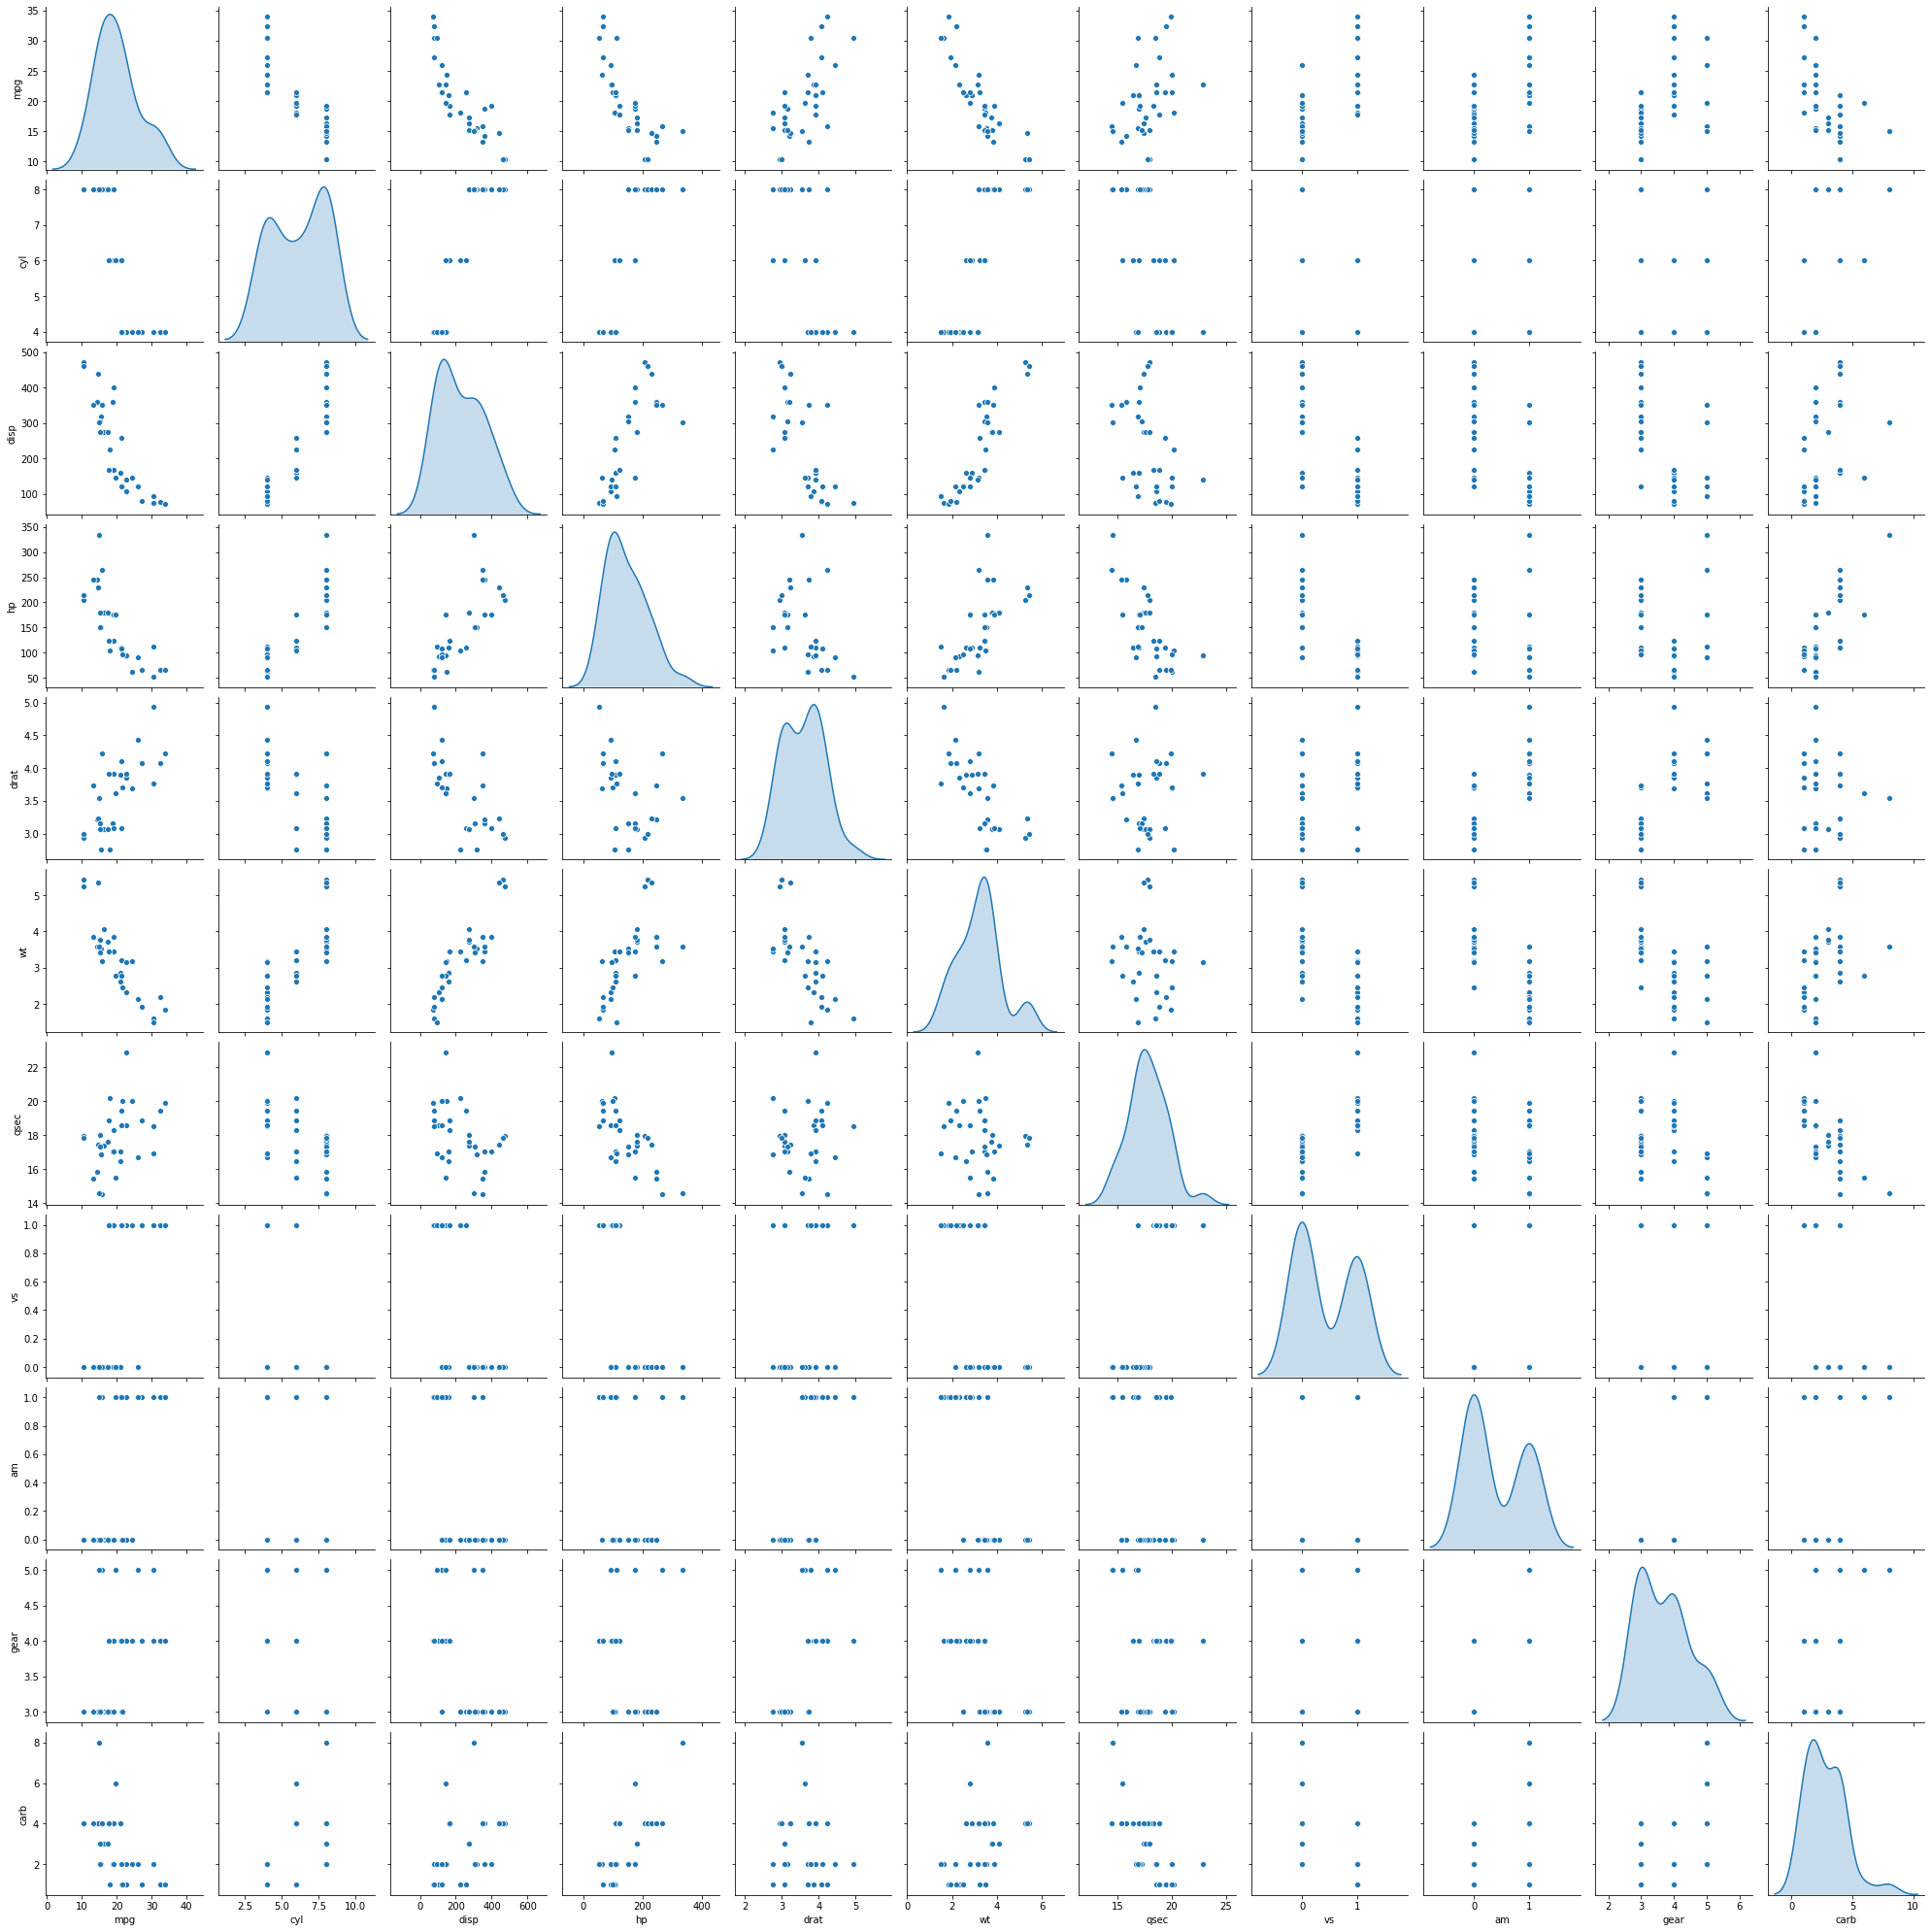

In [92]:
#pairplot
sns.pairplot(mtcars,diag_kind='kde');

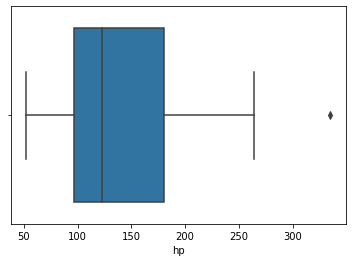

In [110]:
#boxplot to check outlier
sns.boxplot(x=mtcars['hp'])

In [113]:
#detect outlier
filter = mtcars['hp'].values > 300
rem_outlier = mtcars[filter]
rem_outlier

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [116]:
mtcars.drop(30,inplace = True)

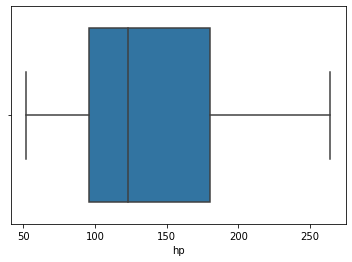

In [117]:
sns.boxplot(x=mtcars['hp'])

# Data manipulation
Data manipulation involves performing some operation on data in order to gather some specific information from the data.

Functionalities od Data Object in python                                                                                 
* head()
* tail()
* values()
* groupby()
* concatenation
* merging

merging is performed using database joins, whereas concatenation combines two or more dataframes do not have any relationship.

In [118]:
#check top values
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [119]:
mtcars.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.7,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [122]:
print(mtcars.values)

[['Mazda RX4' 21.0 6 160.0 110 3.9 2.62 16.46 0 1 4 4]
 ['Mazda RX4 Wag' 21.0 6 160.0 110 3.9 2.875 17.02 0 1 4 4]
 ['Datsun 710' 22.8 4 108.0 93 3.85 2.32 18.61 1 1 4 1]
 ['Hornet 4 Drive' 21.4 6 258.0 110 3.08 3.215 19.44 1 0 3 1]
 ['Hornet Sportabout' 18.7 8 360.0 175 3.15 3.44 17.02 0 0 3 2]
 ['Valiant' 18.1 6 225.0 105 2.76 3.46 20.22 1 0 3 1]
 ['Duster 360' 14.3 8 360.0 245 3.21 3.57 15.84 0 0 3 4]
 ['Merc 240D' 24.4 4 146.7 62 3.69 3.19 20.0 1 0 4 2]
 ['Merc 230' 22.8 4 140.8 95 3.92 3.15 22.9 1 0 4 2]
 ['Merc 280' 19.2 6 167.6 123 3.92 3.44 18.3 1 0 4 4]
 ['Merc 280C' 17.8 6 167.6 123 3.92 3.44 18.9 1 0 4 4]
 ['Merc 450SE' 16.4 8 275.8 180 3.07 4.07 17.4 0 0 3 3]
 ['Merc 450SL' 17.3 8 275.8 180 3.07 3.73 17.6 0 0 3 3]
 ['Merc 450SLC' 15.2 8 275.8 180 3.07 3.78 18.0 0 0 3 3]
 ['Cadillac Fleetwood' 10.4 8 472.0 205 2.93 5.25 17.98 0 0 3 4]
 ['Lincoln Continental' 10.4 8 460.0 215 3.0 5.4239999999999995 17.82 0 0
  3 4]
 ['Chrysler Imperial' 14.7 8 440.0 230 3.23 5.345 17.42 0 0 3